# Лабораторная работа

Чек-лист:
0. Изучите файл annotation.txt. Там содержится информация о датасете.
1. Загрузите датасет data.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите линейную модель. Напишите в markdown свои наблюдения по полученным результатам.

In [68]:
import pandas as pd

In [138]:
ds = pd.read_csv('data.csv')
ds.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [70]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 27820 non-null  object 
 1   age                 27820 non-null  object 
 2   suicides_no         27820 non-null  int64  
 3   population          27820 non-null  int64  
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   HDI for year        8364 non-null   float64
 7    gdp_for_year ($)   27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [71]:
ds.describe()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [81]:
ds['su100k'] = ds['suicides_no']/(ds['population']/100000)
ds.head()

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,su100k
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,6.711409
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,5.194805
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,4.832585
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,4.587156
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,3.281079


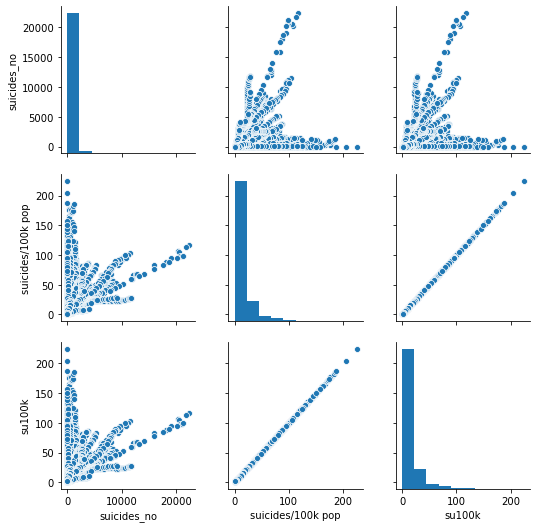

In [73]:
import seaborn as sns
sns.pairplot(ds[['suicides_no', 'suicides/100k pop', 'su100k']])

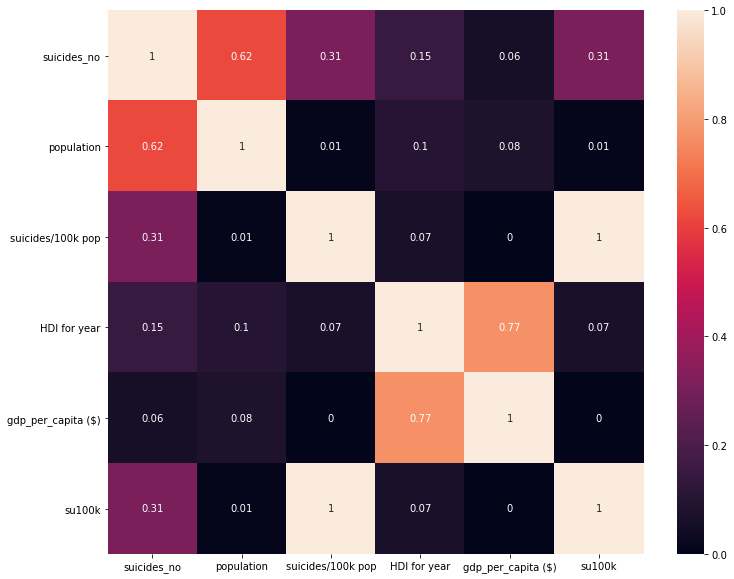

In [74]:
from matplotlib import pyplot as plt
correlation_matrix = ds.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

### План такой:
* sex - переводим в 1/0
* диапазоны AGE дублируются в generation. Но Generation даст мало данных о возрасте. Поэтому каждый даипазон заменим на средний возраст. Generation можно удалить
* само по себе количество уже совершенных суицидов кореллирует с  suicides/100k pop через population, но нормированная метрика лучше, значит убираем suicides_no
* country-year разобьём на country и year в отдельные столбцы. Country потом сделаем labelenc
* HDI for year очень часто пропущен, но в целом метрика полезная, поэтому предположим, что уровень жизни там, где он пропущен, был средним по стране, а если по стране нет совсем, то средним по миру
* годовой ВВП тоже убираем, так как есть нормированный на душу населения

### поехали

In [82]:
# убираем вспомогательный столбец
ds.drop('su100k', axis=1, inplace = True)

In [139]:
ds.sex.replace('male', 1, inplace=True)
ds.sex.replace('female', 0, inplace=True)

In [140]:
ds.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [141]:
ds.age.replace(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], [20, 45, 75, 30, 65, 10], inplace=True)
ds.drop(['generation', 'suicides_no'], axis=1, inplace=True)
ds.head()

,sex,age,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($)
0,1,20,312900,6.71,Albania1987,NaN,"2,156,624,900",796
1,1,45,308000,5.19,Albania1987,NaN,"2,156,624,900",796
2,0,20,289700,4.83,Albania1987,NaN,"2,156,624,900",796
3,1,75,21800,4.59,Albania1987,NaN,"2,156,624,900",796
4,1,30,274300,3.28,Albania1987,NaN,"2,156,624,900",796


In [142]:
ds['year'] = ds['country-year'].apply(lambda x: int(x[-4:]))
ds['country'] = ds['country-year'].apply(lambda x: x[:-4])
ds.head()

,sex,age,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),year,country
0,1,20,312900,6.71,Albania1987,NaN,"2,156,624,900",796,1987,Albania
1,1,45,308000,5.19,Albania1987,NaN,"2,156,624,900",796,1987,Albania
2,0,20,289700,4.83,Albania1987,NaN,"2,156,624,900",796,1987,Albania
3,1,75,21800,4.59,Albania1987,NaN,"2,156,624,900",796,1987,Albania
4,1,30,274300,3.28,Albania1987,NaN,"2,156,624,900",796,1987,Albania


In [143]:
hdi = ds.groupby(['country', 'year']).mean().reset_index()
hdi.head(100)

,country,year,sex,age,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Albania,1987,0.5,40.833333,225800.000000,2.654167,NaN,796.0
1,Albania,1988,0.5,40.833333,230358.333333,2.705000,NaN,769.0
2,Albania,1989,0.5,40.833333,233591.666667,2.783333,NaN,833.0
3,Albania,1992,0.5,40.833333,235208.333333,1.500000,NaN,251.0
4,Albania,1993,0.5,40.833333,233941.666667,2.713333,NaN,437.0
...,...,...,...,...,...,...,...,...
95,Armenia,2007,0.5,40.833333,227942.750000,3.251667,NaN,3366.0
96,Armenia,2008,0.5,40.833333,253782.583333,2.929167,NaN,3829.0
97,Armenia,2009,0.5,40.833333,224141.250000,2.808333,NaN,3215.0
98,Armenia,2010,0.5,40.833333,223018.750000,3.367500,0.721,3460.0


In [146]:
def hdifunc(row):
    chdi = hdi[hdi['country'] == row['country']]['HDI for year'].mean()
    whdi = hdi['HDI for year'].mean()
    if row['HDI for year'] >= 0:
        return row['HDI for year']
    elif chdi >= 0:
        return chdi
    else:
        return whdi       
    

In [147]:
ds['hdifull'] = ds.apply(hdifunc, axis=1)
ds.head()

,sex,age,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),year,country,hdifull
0,1,20,312900,6.71,Albania1987,NaN,"2,156,624,900",796,1987,Albania,0.673
1,1,45,308000,5.19,Albania1987,NaN,"2,156,624,900",796,1987,Albania,0.673
2,0,20,289700,4.83,Albania1987,NaN,"2,156,624,900",796,1987,Albania,0.673
3,1,75,21800,4.59,Albania1987,NaN,"2,156,624,900",796,1987,Albania,0.673
4,1,30,274300,3.28,Albania1987,NaN,"2,156,624,900",796,1987,Albania,0.673


In [151]:
ds.drop(['country-year', 'HDI for year'], axis=1, inplace=True)
ds.head()

,sex,age,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),year,hdifull,country_le
0,1,20,312900,6.71,"2,156,624,900",796,1987,0.673,0
1,1,45,308000,5.19,"2,156,624,900",796,1987,0.673,0
2,0,20,289700,4.83,"2,156,624,900",796,1987,0.673,0
3,1,75,21800,4.59,"2,156,624,900",796,1987,0.673,0
4,1,30,274300,3.28,"2,156,624,900",796,1987,0.673,0


In [168]:
ds.drop(ds.columns[4], axis=1, inplace=True)
ds.head()


,sex,age,population,suicides/100k pop,gdp_per_capita ($),year,hdifull,country_le
0,1,20,312900,6.71,796,1987,0.673,0
1,1,45,308000,5.19,796,1987,0.673,0
2,0,20,289700,4.83,796,1987,0.673,0
3,1,75,21800,4.59,796,1987,0.673,0
4,1,30,274300,3.28,796,1987,0.673,0


In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['country_le'] = le.fit_transform(ds.country)
ds.drop('country', axis = 1, inplace = True)
ds.head()

AttributeError: 'DataFrame' object has no attribute 'country'

In [175]:
ds.describe()

,sex,age,population,suicides/100k pop,gdp_per_capita ($),year,hdifull,country_le
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000
mean,0.500000,40.868799,1.844794e+06,12.816097,16866.464414,2001.258375,0.774395,49.275270
std,0.500009,23.338610,3.911779e+06,18.961511,18887.576472,8.469055,0.085050,29.372538
min,0.000000,10.000000,2.780000e+02,0.000000,251.000000,1985.000000,0.483000,0.000000
25%,0.000000,20.000000,9.749850e+04,0.920000,3447.000000,1995.000000,0.713200,24.000000
50%,0.500000,45.000000,4.301500e+05,5.990000,9372.000000,2002.000000,0.776601,47.000000
75%,1.000000,65.000000,1.486143e+06,16.620000,24874.000000,2008.000000,0.849000,74.000000
max,1.000000,75.000000,4.380521e+07,224.970000,126352.000000,2016.000000,0.944000,100.000000


In [170]:
x = ds.drop('suicides/100k pop', axis = 1)
y = ds['suicides/100k pop']

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [173]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("MAE: \t", round(mean_absolute_error(y_test, y_pred), 2))

R2: 	 0.30596113395192137
RMSE: 	 15.66
MAE: 	 10.04


In [177]:
ds['suicides/100k pop'].mean()

12.816097411933894

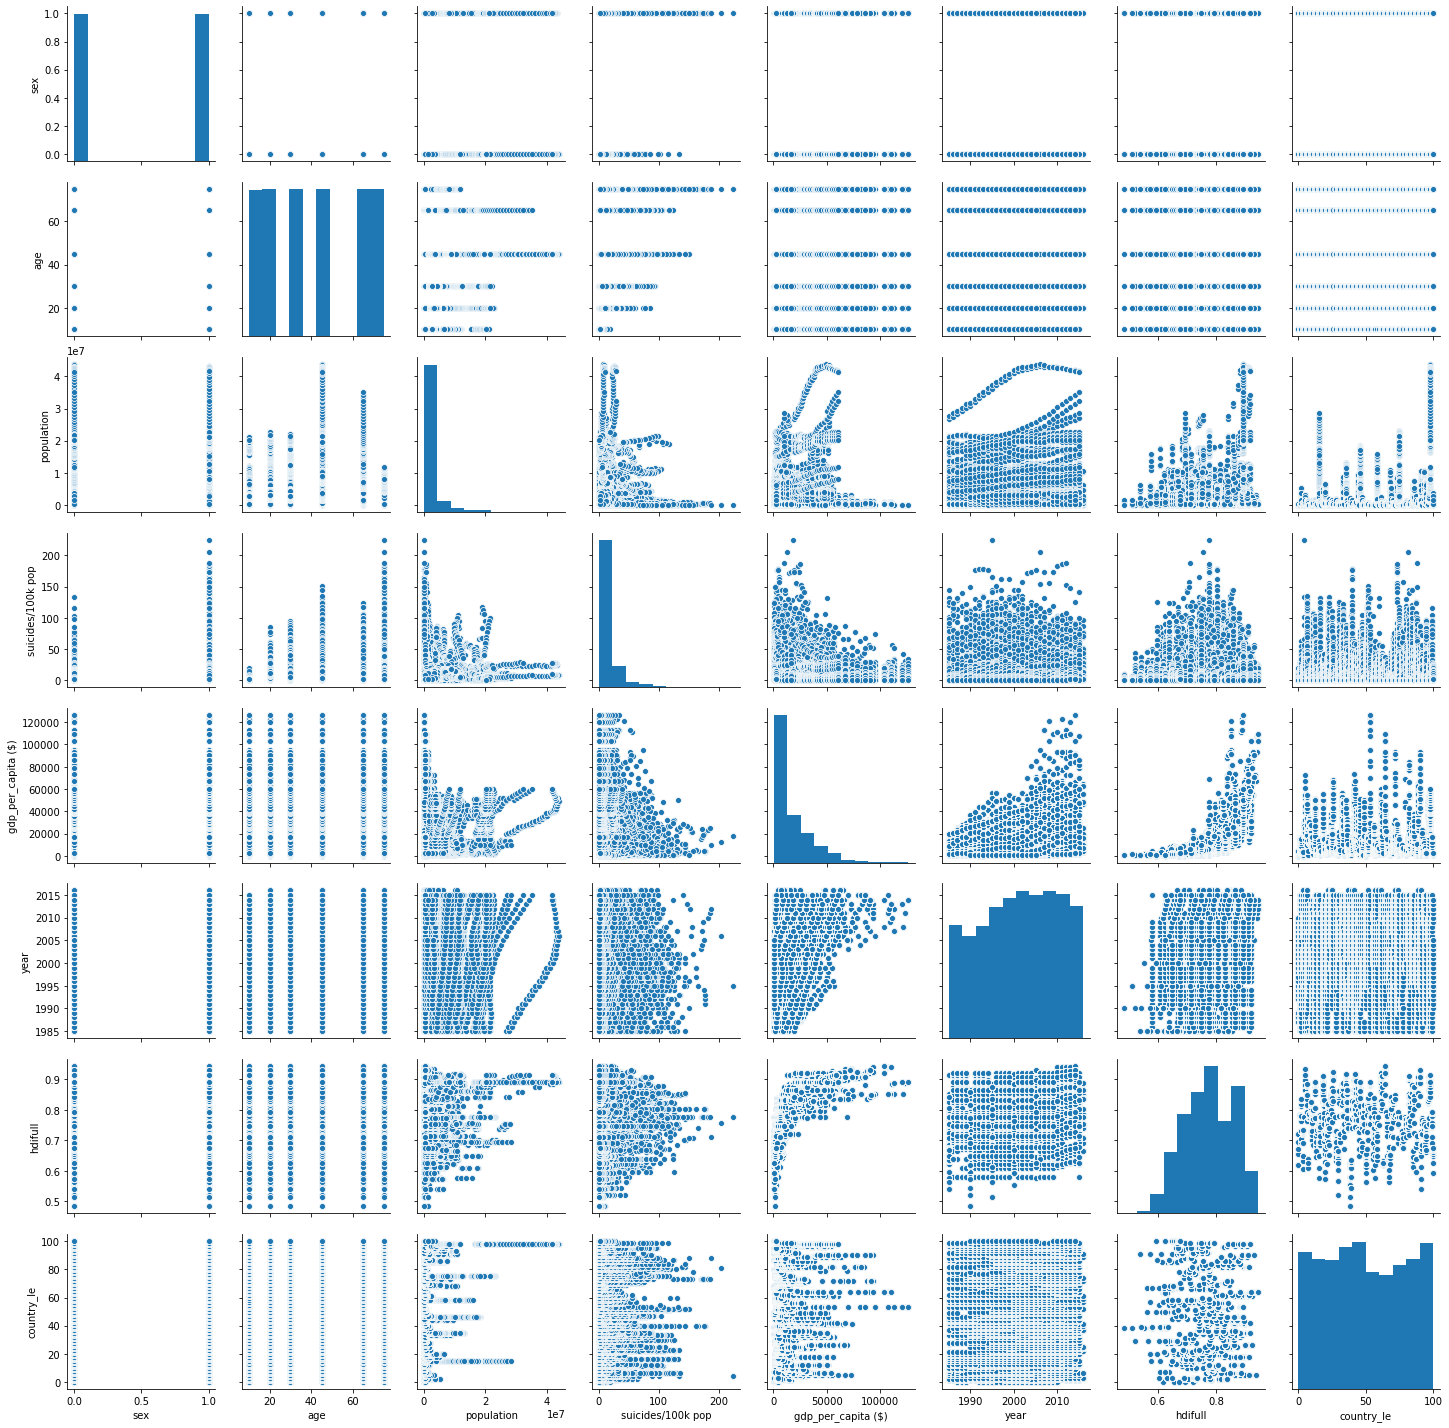

In [178]:
import seaborn as sns
sns.pairplot(ds)

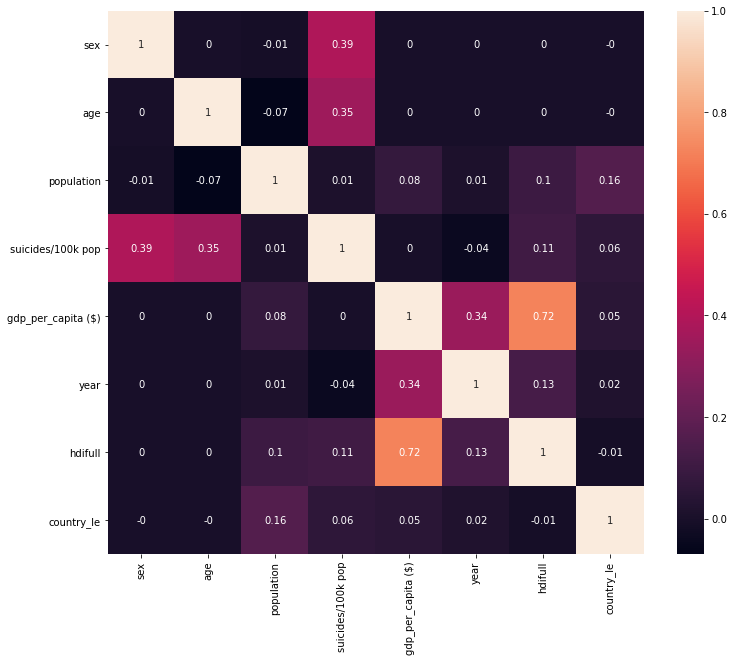

In [179]:
correlation_matrix = ds.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [181]:
ds.drop(['population', ds.columns[4]], axis = 1, inplace = True)

In [184]:
x = ds.drop('suicides/100k pop', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("MAE: \t", round(mean_absolute_error(y_test, y_pred), 2))

R2: 	 0.2975007088594316
RMSE: 	 15.75
MAE: 	 10.01


In [187]:
x = ds[['age', 'sex', 'hdifull']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("MAE: \t", round(mean_absolute_error(y_test, y_pred), 2))

R2: 	 0.28812008897468455
RMSE: 	 15.86
MAE: 	 10.08


In [189]:
from sklearn.ensemble import GradientBoostingRegressor as GDBSklearn
modelb=GDBSklearn()
modelb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [193]:
y_pred = modelb.predict(x_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("MAE: \t", round(mean_absolute_error(y_test, y_pred), 2))

R2: 	 0.4946602126456897
RMSE: 	 13.36
MAE: 	 7.4


## Результат:

* с помощью линейной модели результат получился не очень. При среднем количестве суицидов 12,8 ошибка модели 10
* с градиентным бустингом вышло несколько лучше, 7,4, но все равно далеко от идеала, да и дисперсия ошибок сильно выросла